Testing biological calibration of the Salish Sea Atlantis Model

In [1]:
import os
import xarray as xr
import numpy as np
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
Location_name = {
    '[60, 33]':'Turn Point', '[62, 63]':'Active Pass','[75]':'English Bay', '[1]':'Strait of Juan de Fuca'
}

In [3]:
spillbox = [60, 33]

In [4]:
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/')
scenario_paths = sorted([p for p in scenario_root.glob('v6719_50y_VBITBUCKET-ddmove0-2-ZGppreyWS-1-PL-fishing/outputSalishSea.nc')])
scenario_labels = []
for path in scenario_paths:
    scenario_labels.append(path.parent.stem)
    print(path.parent.stem)

v6719_50y_VBITBUCKET-ddmove0-2-ZGppreyWS-1-PL-fishing


In [5]:
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]

In [6]:
# Reading in Atlantis map
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df_original = gpd.read_file(shapefile_name)
data_df_original = data_df_original.sort_values(by=['BOX_ID'])
data_df = data_df_original.set_index('BOX_ID')
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]
land_df = data_df.loc[land_boxes]
jdf_df = data_df.loc[data_df.Region=='Juan de Fuca']
hs_df = data_df.loc[data_df.Region=='Howe Sound']
strait_df = data_df.loc[data_df.Region=='Strait of Georgia']
ps_df = data_df.loc[data_df.Region=='Puget Sound']

In [7]:
loc_df = data_df.loc[spillbox]

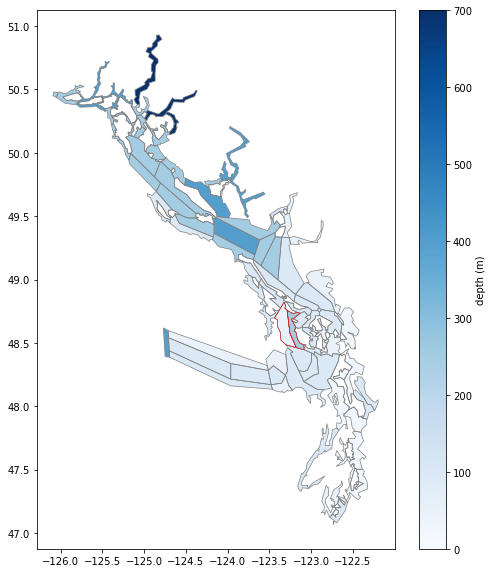

In [8]:
# Location Map
fig, ax = plt.subplots(figsize=(9,12), facecolor='white')   
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-0.95) 
ax = data_df.plot(column = 'BOTZ', ax=ax, cax=cax,cmap=cm.Blues,
    legend=True, legend_kwds={'label': 'depth (m)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
loc_df.boundary.plot(ax=ax, color='red',linewidths=0.5)
land_df.plot(ax=ax, color='white');

In [9]:
def plot_biomass(group, v_max=None, v_min=None):
    fig, ax = plt.subplots(figsize = (14,3)) 
    labels = []

    for scenario in scenario_datasets:
        for species in group:
            spp_name = str(group[species]) + '_N'
            var_tbl = scenario.variables[group[species] + '_N'][:,spillbox,0:6]
            var_tb = var_tbl.sum(axis=2)
            ax.semilogy(scenario.t, var_tb.mean(axis=1), linewidth = 2) 
            labels.append(species)
            ax.set_title(Location_name[str(spillbox)], fontsize = 12)
            ax.set_ylabel('mg N m$^{-3}$')
            ax.tick_params(labelsize=12)
        ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [10]:
def plot_vertebrates(group, v_max=None, v_min=None):
    fig, ax = plt.subplots(figsize = (14,3)) 
    labels = []

    for scenario in scenario_datasets:
        for species in group:
            spp_name = str(group[species]) + '3_Nums'
            var_tbl = scenario.variables[group[species] + '3_Nums'][:,spillbox,0:6]
            var_tb = var_tbl.sum(axis=2)
            ax.semilogy(scenario.t, var_tb.mean(axis=1), linewidth = 2) 
            labels.append(species)
            ax.set_title(Location_name[str(spillbox)], fontsize = 12)
            ax.set_ylabel('Number')
            ax.tick_params(labelsize=12)
        ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [11]:
def plot_benthic_biomass(group, v_max=None, v_min=None):
    fig, ax = plt.subplots(figsize = (14,3)) 
    labels = []

    for scenario in scenario_datasets:
        for species in group:
            spp_name = str(group[species]) + '_N'
            var_tb = scenario.variables[group[species] + '_N'][:,spillbox]
            ax.semilogy(scenario.t, var_tb.mean(axis=1), linewidth = 2) 
            labels.append(species)
            ax.set_title(Location_name[str(spillbox)], fontsize = 12)
            ax.set_ylabel('mg N m$^{-3}$')
            ax.tick_params(labelsize=12)
        ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [12]:
def plot_biomass_individual(group, v_max=None, v_min=None):
  
    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(4, 4, height_ratios=[3, 3, 3, 3])

    for scenario in scenario_datasets:
        for species in group:

            b_index = (list(group).index(species))

            if b_index < 4:
                position = 0, b_index
            elif b_index > 7: 
                position = 2, b_index-8
            else :
                position = 1, b_index-4

            dVar_s = scenario.variables[group[species] + '_N'][:,spillbox,0:6]
            scen_tb = dVar_s.sum(axis=2)
            scen = scen_tb.mean(axis=1)

            ax = fig.add_subplot(gs[position])
            divider = make_axes_locatable(ax)
            ax.plot(scenario.t, scen, linewidth = 2) 
            ax.set_title(str(group[species]), fontsize = 12)
            ax.tick_params(labelsize=12)
            #ax.set_ylabel('mg N m$^{-3}$')

In [13]:
def plot_benthic_individual(group, v_max=None, v_min=None):
  
    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(4, 4, height_ratios=[3, 3, 3, 3])

    for scenario in scenario_datasets:
        for species in group:

            b_index = (list(group).index(species))

            if b_index < 4:
                position = 0, b_index
            elif b_index > 7: 
                position = 2, b_index-8
            else :
                position = 1, b_index-4

            dVar_s = scenario.variables[group[species] + '_N'][:,spillbox]
            scen = dVar_s.mean(axis=1)

            ax = fig.add_subplot(gs[position])
            divider = make_axes_locatable(ax)
            ax.plot(scenario.t, scen, linewidth = 2) 
            ax.set_title(str(group[species]), fontsize = 12)
            ax.tick_params(labelsize=12)
            #ax.set_ylabel('mg N m$^{-3}$')

In [14]:
def plot_vertebrate_individual(group, v_max=None, v_min=None):
  
    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(4, 4, height_ratios=[1,1,1,1])

    for scenario in scenario_datasets:

        #end = len(scenario.t)

        for species in group:

            b_index = (list(group).index(species))

            if b_index < 4:
                position = 0, b_index
            elif b_index > 7 < 12: 
                position = 2, b_index-8
            elif b_index > 11 < 16: 
                position = 3, b_index-16    
            else :
                position = 1, b_index-4

            dVar_s = scenario.variables[group[species] + '3_Nums'][:,spillbox,0:6]
            scen_tb = dVar_s.sum(axis=2)
            scen = scen_tb.mean(axis=1)

            ax = fig.add_subplot(gs[position])
            divider = make_axes_locatable(ax)
            ax.plot(scenario.t, scen, linewidth = 2) 
            ax.set_title(str(group[species]), fontsize = 12)
            ax.tick_params(labelsize=12)
            #ax.set_ylabel('mg N m$^{-3}$')

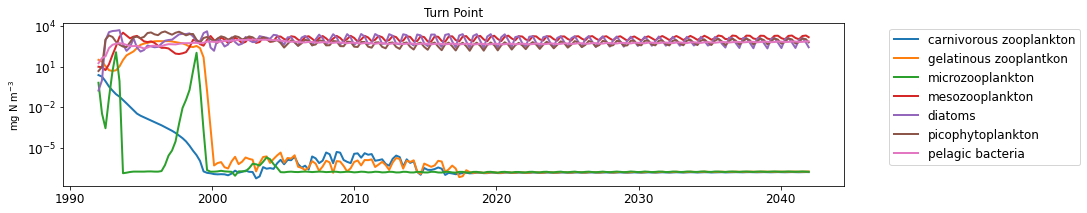

In [15]:
plot_biomass(groups.plankton)

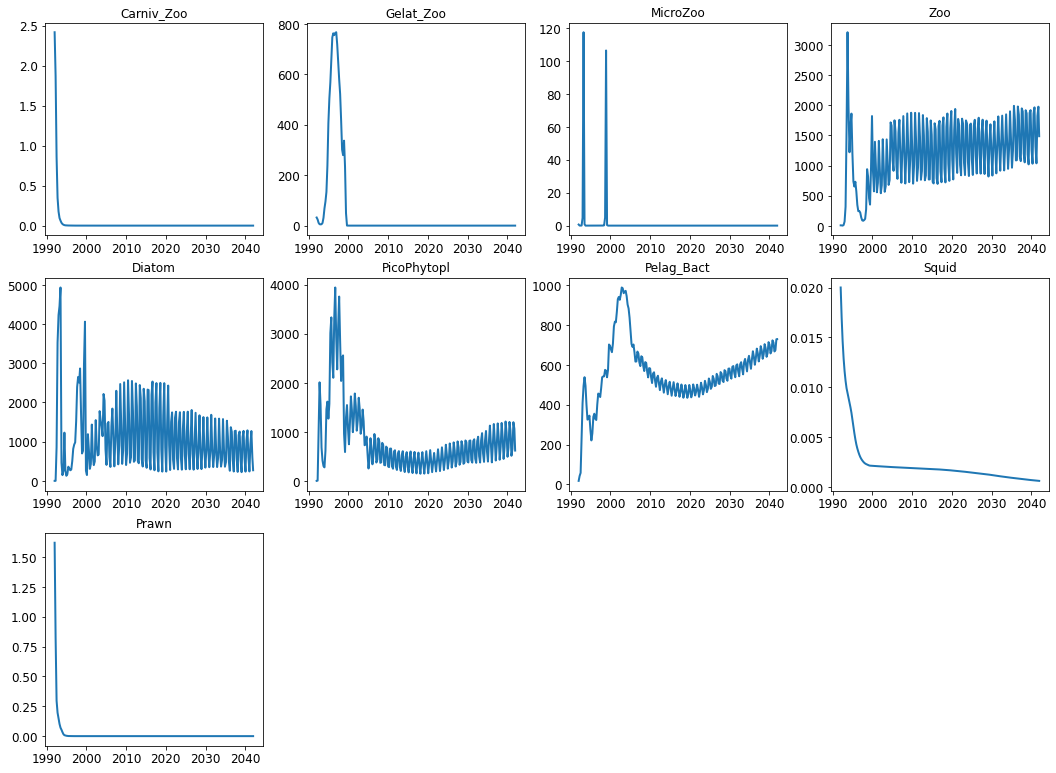

In [16]:
plot_biomass_individual(groups.planktonic)

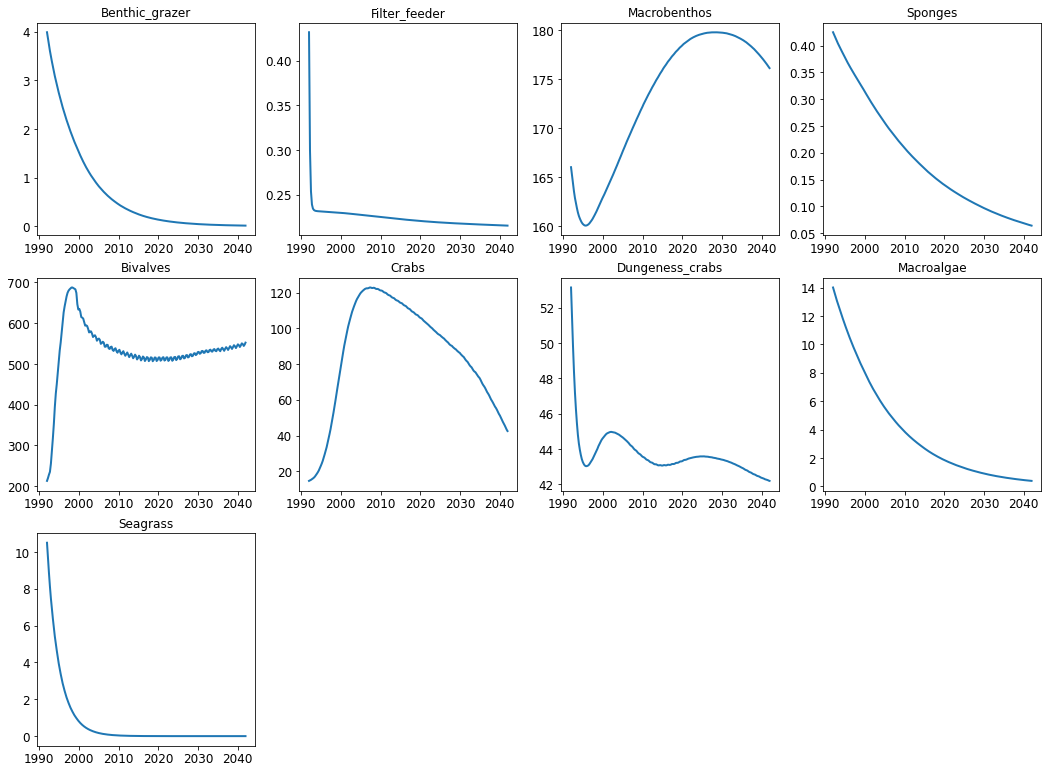

In [17]:
plot_benthic_individual(groups.benthos)

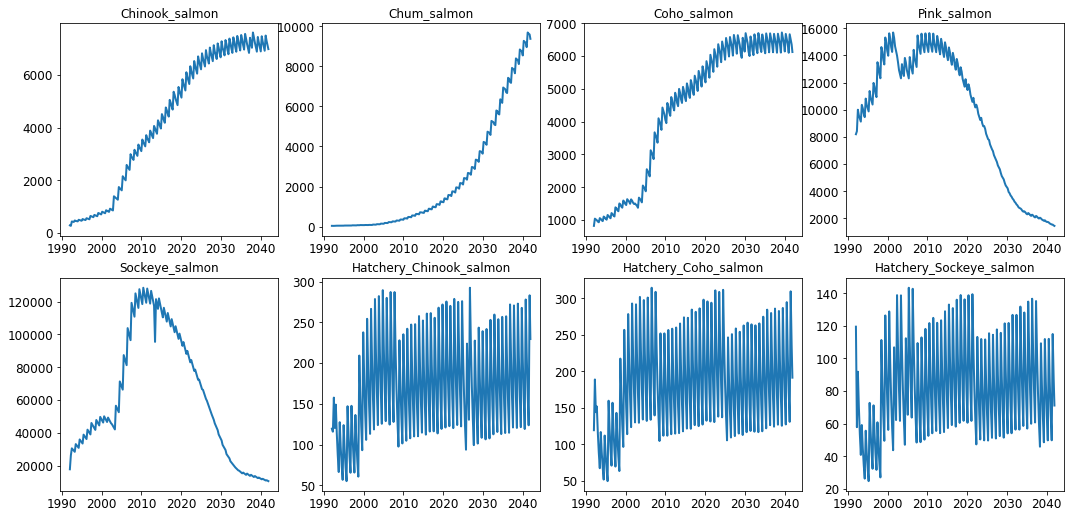

In [18]:
plot_vertebrate_individual(groups.salmon)

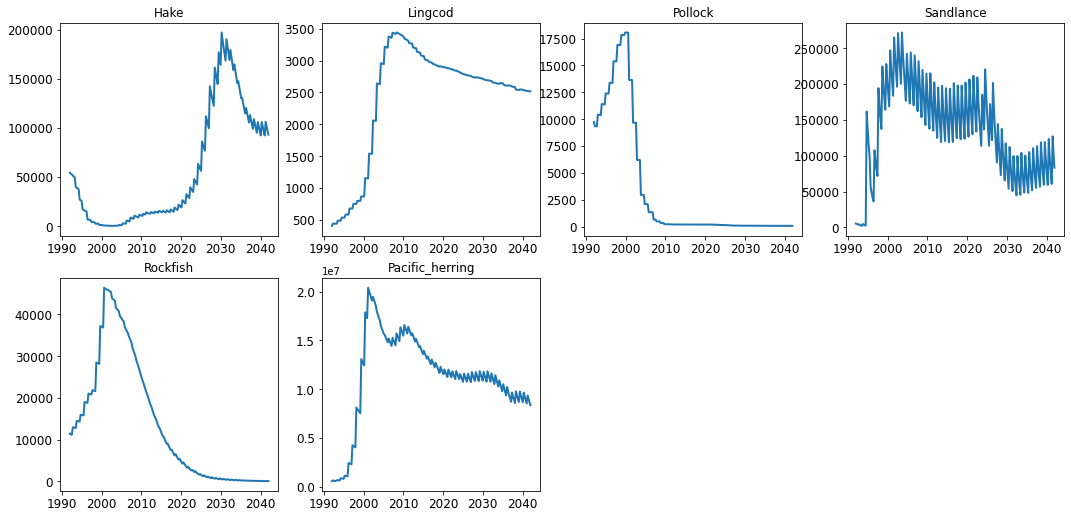

In [19]:
plot_vertebrate_individual(groups.named_fish)

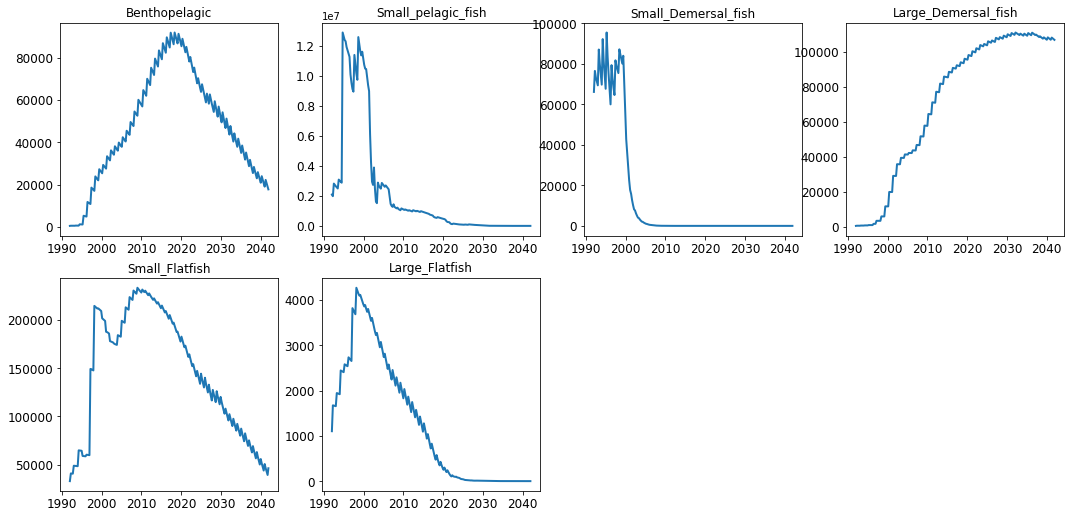

In [20]:
plot_vertebrate_individual(groups.other_fish)

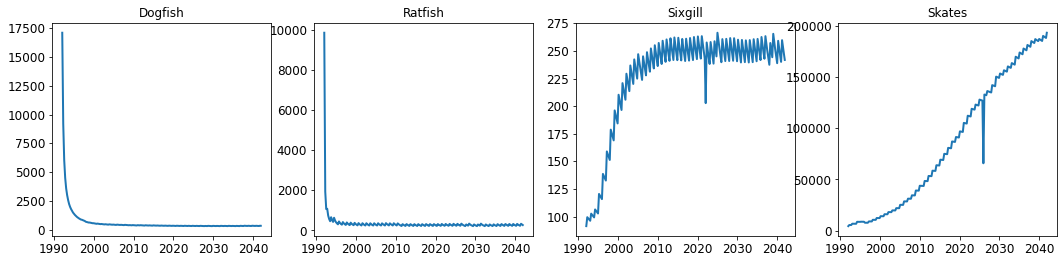

In [21]:
plot_vertebrate_individual(groups.sharks)

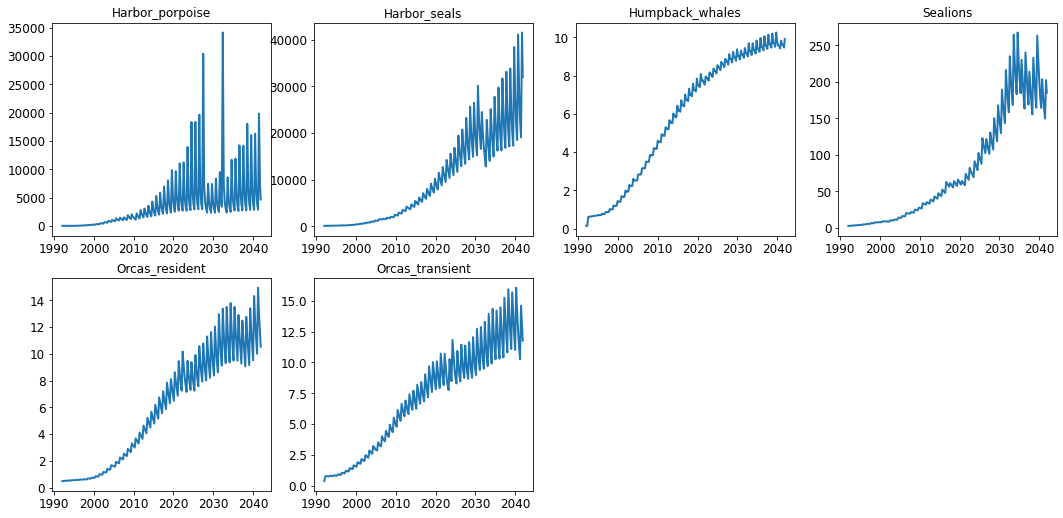

In [22]:
plot_vertebrate_individual(groups.mammals)